In [4]:
from packages import *

In [5]:
data_path = '../DATA/A-4/'
file_path = lambda tau, n: data_path + 'A-4_{}s_{}_100mV.csv'.format(tau, n)
COLUMNS = ['frequency [Hz]',	'output p-p [mV]',	'input p-p [mV]']
def get_data(tau, n):
  data = pd.read_csv(file_path(tau, n))
  freq, out, inp = [data[COLUMNS[i]] for i in range(3)]
  out = np.array(out); inp = np.array(inp)
  gain = out / inp
  return freq, gain

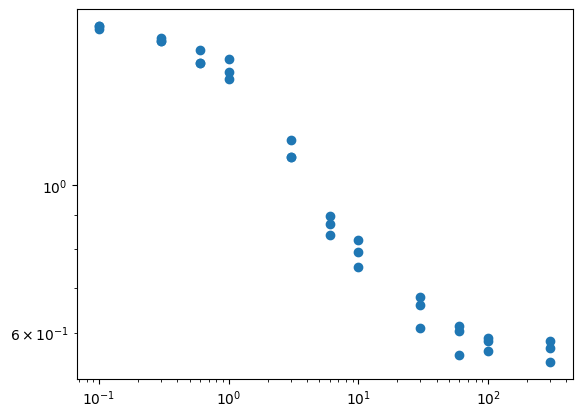

In [16]:
freq, gain = get_data(0.1, 6)
plt.scatter(freq, gain)
plt.xscale('log')
plt.yscale('log')